# importing libraries

In [1]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# loading dataset

In [2]:
df = pd.read_csv('weatherAU.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


# understanding dataset

In [4]:
df.shape

(145460, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  object 
 1   Location      145460 non-null  object 
 2   MinTemp       143975 non-null  float64
 3   MaxTemp       144199 non-null  float64
 4   Rainfall      142199 non-null  float64
 5   WindSpeed9am  143693 non-null  float64
 6   WindSpeed3pm  142398 non-null  float64
 7   Humidity9am   142806 non-null  float64
 8   Humidity3pm   140953 non-null  float64
 9   Pressure9am   130395 non-null  float64
 10  Pressure3pm   130432 non-null  float64
 11  Temp9am       143693 non-null  float64
 12  Temp3pm       141851 non-null  float64
 13  RainToday     142199 non-null  object 
 14  RainTomorrow  142193 non-null  object 
dtypes: float64(11), object(4)
memory usage: 16.6+ MB


In [6]:
df = df.drop(["Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [7]:
df = df.dropna(axis = 0)
df.shape

(123968, 13)

In [8]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# preprocessing data

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [10]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [11]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

# checking null values

In [12]:
df.isna().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

# corellation between the features

In [13]:
df_corr=df.corr()
df_corr

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.727169,0.108952,0.198994,0.175077,-0.242761,0.027022,-0.448508,-0.458124,0.902186,0.701827,0.057615,0.086310
MaxTemp,0.727169,1.000000,-0.070536,0.030199,0.044558,-0.521224,-0.497169,-0.328322,-0.422113,0.881235,0.984221,-0.232169,-0.160280
Rainfall,0.108952,-0.070536,1.000000,0.089099,0.061025,0.224291,0.252859,-0.166490,-0.125815,0.015438,-0.074372,0.496649,0.236652
WindSpeed9am,0.198994,0.030199,0.089099,1.000000,0.510045,-0.269274,-0.032043,-0.227593,-0.175666,0.144709,0.014842,0.105527,0.092933
WindSpeed3pm,0.175077,0.044558,0.061025,0.510045,1.000000,-0.133663,0.031878,-0.297384,-0.258105,0.162724,0.018201,0.085870,0.090468
Humidity9am,-0.242761,-0.521224,0.224291,-0.269274,-0.133663,1.000000,0.672189,0.140865,0.188062,-0.481034,-0.512705,0.356893,0.260535
Humidity3pm,0.027022,-0.497169,0.252859,-0.032043,0.031878,0.672189,1.000000,-0.027325,0.052004,-0.199793,-0.547142,0.378778,0.449053
Pressure9am,-0.448508,-0.328322,-0.166490,-0.227593,-0.297384,0.140865,-0.027325,1.000000,0.961515,-0.419336,-0.285666,-0.190340,-0.246916
Pressure3pm,-0.458124,-0.422113,-0.125815,-0.175666,-0.258105,0.188062,0.052004,0.961515,1.000000,-0.465684,-0.388427,-0.107759,-0.228031
Temp9am,0.902186,0.881235,0.015438,0.144709,0.162724,-0.481034,-0.199793,-0.419336,-0.465684,1.000000,0.855474,-0.097263,-0.024814


# visualization

(array([   32.,  2404., 17910., 28493., 28432., 22330., 16230.,  6034.,
         1939.,   164.]),
 array([ 2.6 ,  7.15, 11.7 , 16.25, 20.8 , 25.35, 29.9 , 34.45, 39.  ,
        43.55, 48.1 ]),
 <BarContainer object of 10 artists>)

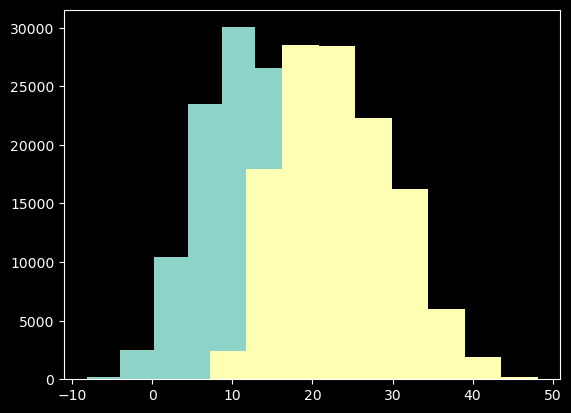

In [14]:
plt.hist(df['MinTemp'])
plt.hist(df['MaxTemp'])

(array([1.22725e+05, 9.41000e+02, 2.04000e+02, 5.60000e+01, 2.80000e+01,
        7.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  0. ,  37.1,  74.2, 111.3, 148.4, 185.5, 222.6, 259.7, 296.8,
        333.9, 371. ]),
 <BarContainer object of 10 artists>)

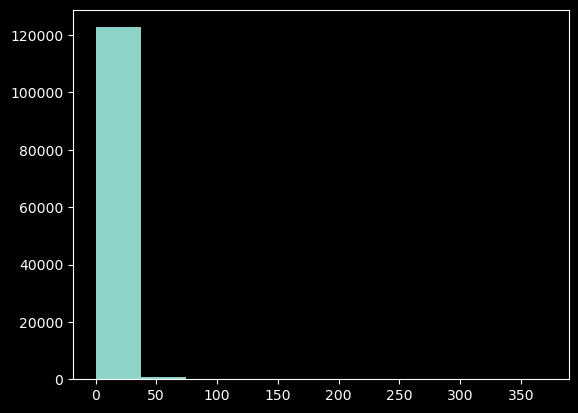

In [15]:
plt.hist(df['Rainfall'])

(array([3.2125e+04, 5.2878e+04, 2.7918e+04, 8.0930e+03, 2.2970e+03,
        5.3700e+02, 9.0000e+01, 2.7000e+01, 1.0000e+00, 2.0000e+00]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <BarContainer object of 10 artists>)

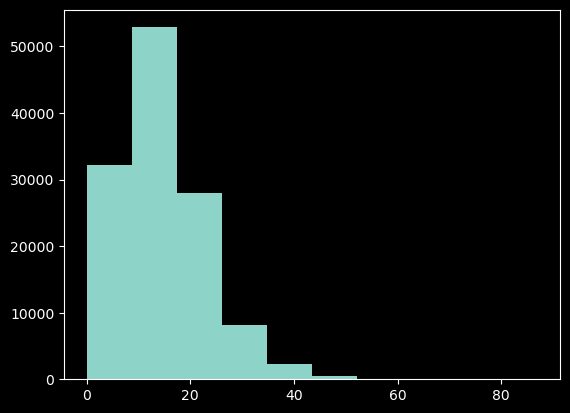

In [16]:
plt.hist(df['WindSpeed9am'])

(array([  265.,  1432.,  2863.,  4868.,  9503., 18159., 25112., 24601.,
        18943., 18222.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

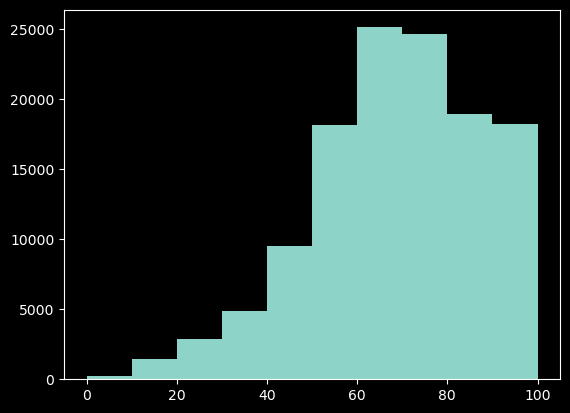

In [17]:
plt.hist(df['Humidity9am'])

(array([1.6000e+01, 1.3100e+02, 6.9600e+02, 3.2020e+03, 1.5645e+04,
        3.5873e+04, 3.9664e+04, 2.1441e+04, 6.5030e+03, 7.9700e+02]),
 array([ 980.5 ,  986.55,  992.6 ,  998.65, 1004.7 , 1010.75, 1016.8 ,
        1022.85, 1028.9 , 1034.95, 1041.  ]),
 <BarContainer object of 10 artists>)

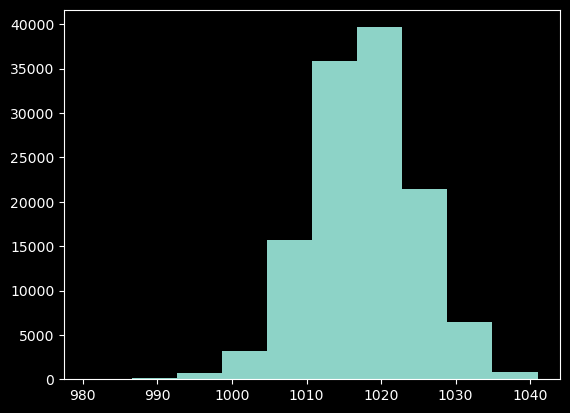

In [18]:
plt.hist(df['Pressure9am'])

(array([  238.,  2644., 13031., 27807., 30257., 24830., 16342.,  7795.,
          964.,    60.]),
 array([-3.1 ,  1.23,  5.56,  9.89, 14.22, 18.55, 22.88, 27.21, 31.54,
        35.87, 40.2 ]),
 <BarContainer object of 10 artists>)

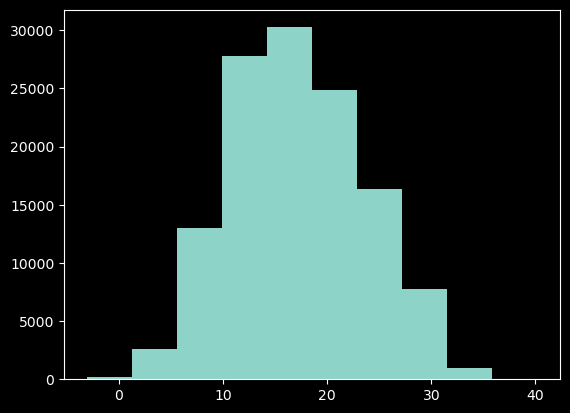

In [19]:
plt.hist(df['Temp9am'])

(array([96357.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 27611.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

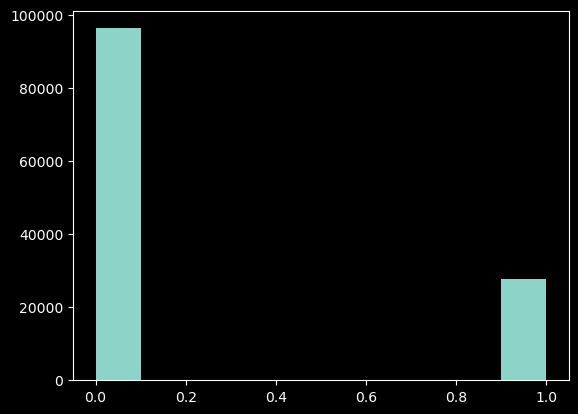

In [20]:
plt.hist(df['RainToday'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

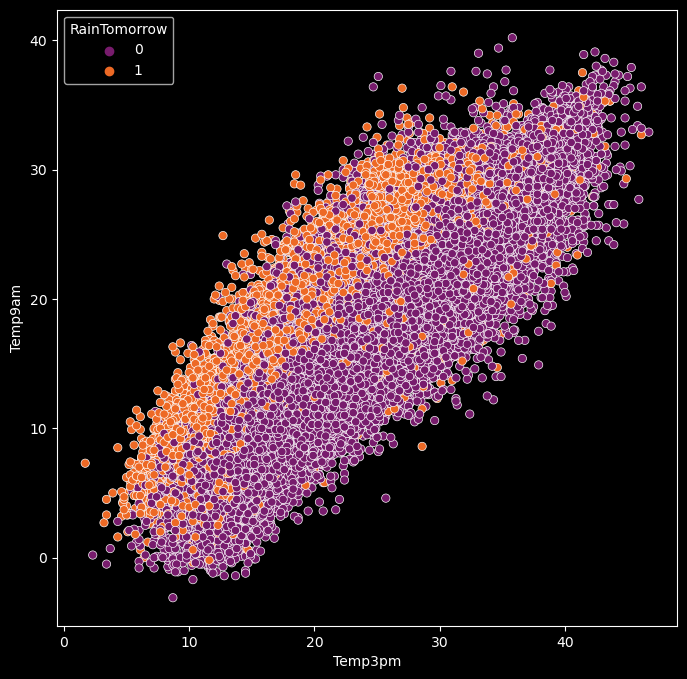

In [21]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Temp3pm', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


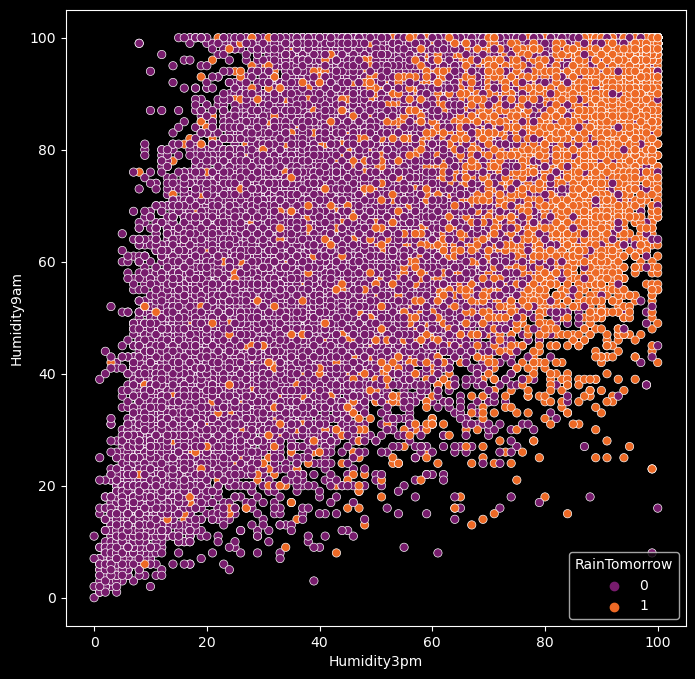

In [22]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity3pm', y = 'Humidity9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:xlabel='Temp9am', ylabel='RainTomorrow'>

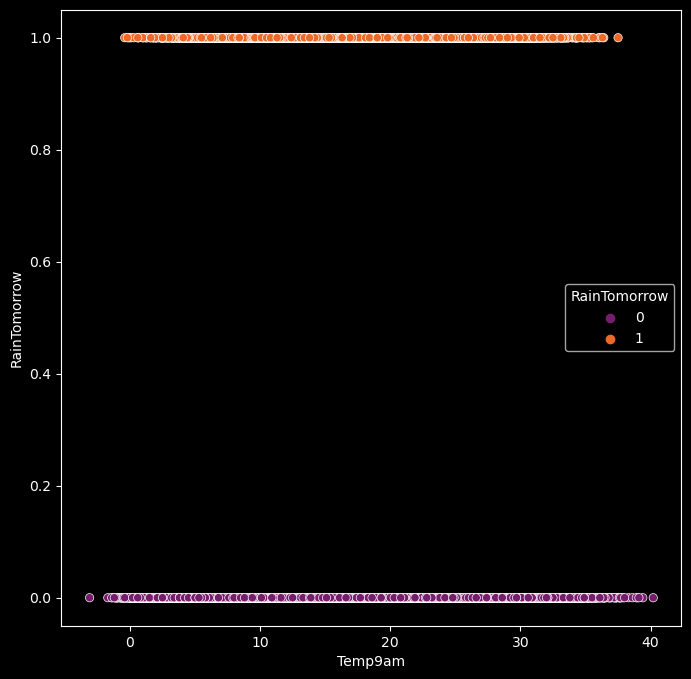

In [23]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Temp9am', y = 'RainTomorrow', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<AxesSubplot:>

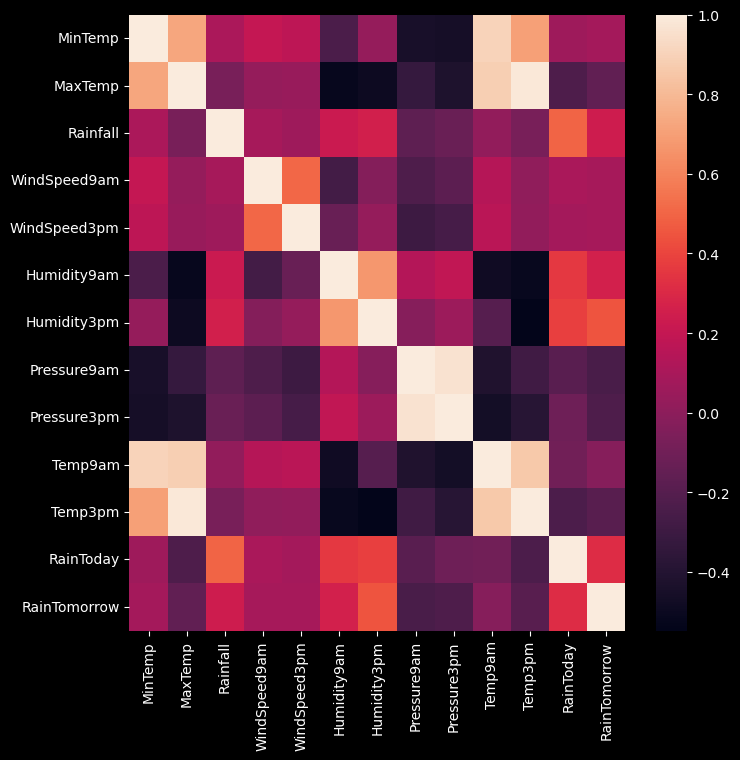

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# linear regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[18311   871]
 [ 3292  2320]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     19182
           1       0.73      0.41      0.53      5612

    accuracy                           0.83     24794
   macro avg       0.79      0.68      0.71     24794
weighted avg       0.82      0.83      0.81     24794

0.8320964749536178


E:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions=dt.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))


[[16309  2873]
 [ 2670  2942]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19182
           1       0.51      0.52      0.51      5612

    accuracy                           0.78     24794
   macro avg       0.68      0.69      0.68     24794
weighted avg       0.78      0.78      0.78     24794

0.7764378478664193


In [35]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predictions=rf.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))


[[18241   941]
 [ 2887  2725]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     19182
           1       0.74      0.49      0.59      5612

    accuracy                           0.85     24794
   macro avg       0.80      0.72      0.75     24794
weighted avg       0.84      0.85      0.83     24794

0.8456078083407276


In [32]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Naivebayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
predictions=nb.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[17150  2032]
 [ 2678  2934]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     19182
           1       0.59      0.52      0.55      5612

    accuracy                           0.81     24794
   macro avg       0.73      0.71      0.72     24794
weighted avg       0.80      0.81      0.81     24794

0.8100346858110833


In [34]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])